[PDF](<Session 4.pdf>)

[CODE](<Session 4.txt>)

[INVENTORY STRUCTURE](<INVENTORY STRUCTURE V3.xlsx>)

# Assignment 5

1 ) EID NAME CITY DOJ DEPT DESI SALARY  OF THE DELHI EMPLOYEES

select emp.eid,name,city,doj,dept,desi,salary
from emp
inner join emp_sal
on emp.eid=emp_sal.eid
where city='delhi'


2 ) DETAILS OF ALL THE EMPLOYEES WHOSE SALARY DETAILS ARE NOT AVAILABLE. 


select emp.eid,name,city,doj,dept,desi,salary
from emp
inner join emp_sal
on emp.eid=emp_sal.eid
where salary is null

# Inventory structure

create table supplier
(
    sid char(5) primary key,
    sname varchar(20) not null,
    sadd varchar(50) not null,
    scity varchar(20) default 'delhi',
    sphone varchar(15) unique key,
    email varchar(20)
)

create table product
(
    pid char(5) primary key,
    pdesc varchar(20) not null,
    price float check(price>0),
    category char(2) check(category in ('IT','HA','HC'))
    sid char(5) references supplier(sid)
)

create table cust
(
    cid char(5) primary key,
    cname varchar(20) not null,
    address varchar(20) not null,
    city varchar(20) not null,
    phone varchar(20) not null,
    email varchar(20) not null,
    dob date check(dob< '1-jan-2000')
)

create table stock
(
    pid char(5) references product(pid),
    sqty int check(sqty>=0),
    rol int check(rol>0),
    moq int check(moq>=5)
)

create table orders
(
    oid char(5) primary key
    pid char(5) references product(pid),
    cid char(5) references cust(cid),
    oqty int check(oqty>=1),
    odate date

)

# Indexing

In database data in stored in table as blocks, for example if there is 10000 rows in a table.

- The 10000 rows will be partition as 1000 blocks

- index is a lookup table which have 
    - search attribute(which is the field in the main table which we used for indexing) 
    - block point which points to a block
    
  in index lookup table from each block of table one search attribute value will be taken and its corresponding block as block point. this is how tndex tables created.

- Index lookup table must be small else for index table itself searching will be difficult.

- **Sparse Indexing:** if the blocks are sorted then lookup table will be small, coz only one value from one block in a table is required for creating lookuptable. for example my index table has search attribute as "roll no" 1,11,21,31 and block points as 1,2,3,4. If i searched for rollno 12 in query then i need to check only 1 block 11-->2. so if main table is sorted then its **Sparse Indexing**

- **Dense Index:** if main table is not storted the look uptable have to have all values from values for search attributes , ex: if roll no is search attribute for lookup table for every value of rollno blockpoint is required on lookup table. then lookup table will also have 10000 table even thought its not efficient as **sparse index** its better than searching whole entire table.

- Index table has to be sorted always.

- since index table is sorted searching is doing by binary search.so time requred to find block is log2 n , n is the number of rows in index table.log2 n+1 for finding the block and get in to data also.

# Types of Indexing

**single level indexing**

 - Primary indexing
 
    - search attribute will be **primary key**.

    - For primary indexing main file should be **sorted by PK**.

    - it will be a **sparse indexing**

 - secondary indexing or unclustered indexing

    - main table will be **unsorted or sorted with any other keys not the search attribute on current lookup table** 

    - search attribute will be **non key or key attribute** it doesnt matter because it will be a **dense indexing** so all value have to be in lookup table.

    - even secoundary index is less efficient than other index, but since lookup table is sorted we can do binary search, so its better than not indexing.but in main table data is not sorted we cant do binary search so we have to do linear search which is very less efficient.

    - if there is multipe duplicate values in main table , from lookup table block pointer will point to another block pointer collection , collection contain pointers to all those dupliacte values. 

 - clustered indexing

   - search attribute will be **non key attribute**.

   - For clustered indexing main file should be **sorted by NON Key Field**.

   - non key attribute is the attribute which cant used to identify a row uniquely.

   - it will be a **sparse indexing** but here indexing is diffrent from primary indexing

      - in primary indexing lookuptable is created by taking first pk key from each block

      - here lookup table is created with distinct value of that non key field.

      - here we have sorted main table and distinct valued search attribute,Blockpointer lookup table

      - blockpointer will point to first occured search attribute 's block in main table, then from there value will be fetched.

      - 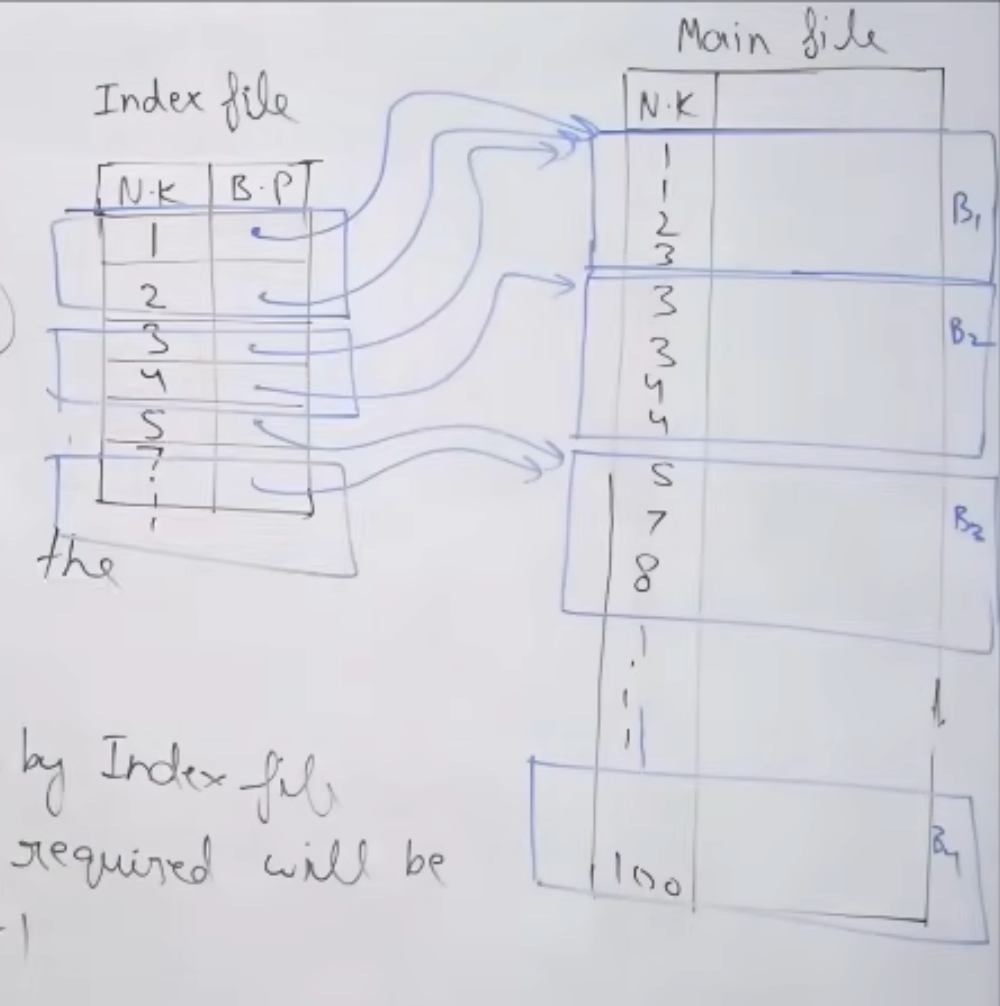

      - Note: there is a condition which might happen

         - example first block have 1,2,2,3

         - sec block 3,3,3,3

         - third block 4,4,4,4

         - in this senario  if i try to access 3 it will go to first block i cant access 2nd block coz 3 appear first on 1st block.

         - but not to worry if i need 3 in sec bock after getting to 1st block it will go to next block if required 3 did'nt find.

         - because of this reason in which step we found result will be >=log2 n+1 (here steps will be >= not =)


**multiple level indexing:** if the lookuptable is soo large(dont means dense indexing), means table its self is too large so lookup table got also larger than normal so we use one more level of lookuptable from 1st lookup table.


clustered index : it will change table structure(order)

    - clustered index: indexed by non key attribute

    - primary index: its default clustered index, indexed by primary key

    - either one of above is possible for a table coz a table can't sort by two ways at a time. 